<a href="https://colab.research.google.com/github/nicoRomeroCuruchet/DynamicProgramming/blob/main/testing_bary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
from PolicyIteration import PolicyIteration
from utils.utils import plot_2D_value_function,\
                        plot_3D_value_function,\
                        test_enviroment

# CartPoleEnv 

### Observation Space

The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:

| Num | Observation           | Min                 | Max               |
|-----|-----------------------|---------------------|-------------------|
| 0   | Cart Position         | -4.8                | 4.8               |
| 1   | Cart Velocity         | -Inf                | Inf               |
| 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3   | Pole Angular Velocity | -Inf                | Inf               |

### Action Space

The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction
of the fixed force the cart is pushed with.

- 0: Push cart to the left
- 1: Push cart to the right

In [ ]:
# Train cartpole environment:

from classic_control.cartpole import CartPoleEnv

env = CartPoleEnv(sutton_barto_reward=True)
# position thresholds:
x_lim = 2.5
theta_lim = 0.25 
# velocity thresholds:
x_dot_lim = 2.5
theta_dot_lim = 2.5

bins_space = {
    "x_space": np.linspace(-x_lim, x_lim, 20),                         # position space         (0)
    "x_dot_space": np.linspace(-x_dot_lim, x_dot_lim, 20),             # velocity space         (1)
    "theta_space": np.linspace(-theta_lim, theta_lim, 20),             # angle space            (2)
    "theta_dot_space": np.linspace(-theta_dot_lim, theta_dot_lim, 20), # angular velocity space (3)
}

pi = PolicyIteration(
    env=env, 
    bins_space=bins_space,
    action_space=[0, 1],
    gamma=0.99,
    theta=1e-3
)

pi.run()

In [ ]:
# Test cartpole environment:

with open(env.__class__.__name__ + ".pkl", "rb") as f:
    pi = pickle.load(f)

test_enviroment(CartPoleEnv(sutton_barto_reward=True, render_mode="human"), pi)

# Continuous_MountainCarEnv

## Observation Space

The observation is a `ndarray` with shape `(2,)` where the elements correspond to the following:

| Num | Observation                          | Min  | Max | Unit         |
|-----|--------------------------------------|------|-----|--------------|
| 0   | position of the car along the x-axis | -Inf | Inf | position (m) |
| 1   | velocity of the car                  | -Inf | Inf | position (m) |

## Action Space

The action is a `ndarray` with shape `(1,)`, representing the directional force applied on the car.
The action is clipped in the range `[-1,1]` and multiplied by a power of 0.0015.


In [ ]:
# Train mountain car environment:

from classic_control.continuous_mountain_car import Continuous_MountainCarEnv

env=Continuous_MountainCarEnv()

bins_space = {
    "x_space":     np.linspace(env.min_position, env.max_position, 257),      # position space         (0)
    "x_dot_space": np.linspace(-abs(env.max_speed), abs(env.max_speed), 257), # velocity space         (1)
}

pi = PolicyIteration(
    env=env, 
    bins_space=bins_space,
    action_space=[-1, 1],
    gamma=0.99,
    theta=1e-3,
)

pi.run()

In [ ]:
# Test mountain car environment:

with open(env.__class__.__name__ + ".pkl", "rb") as f:
    pi: PolicyIteration = pickle.load(f)

test_enviroment(Continuous_MountainCarEnv(render_mode="human"), pi)

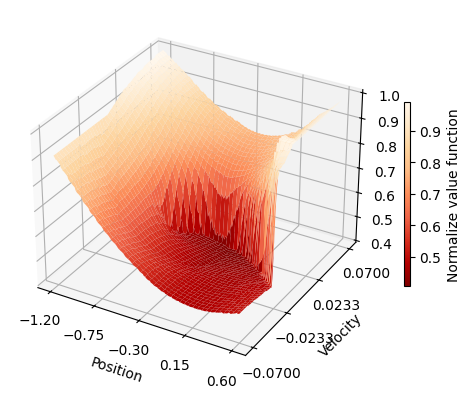

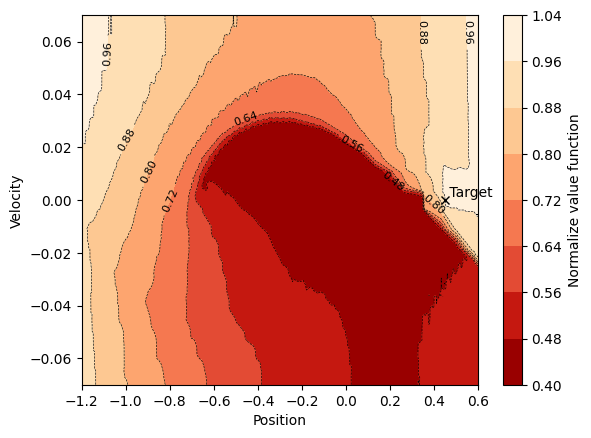

In [9]:
# graph the value function of the mountain car environment:
plot_3D_value_function(pi.value_function)
plot_2D_value_function(pi.value_function)